# <center>Digital Image Processing - Problem Set 3</center>

### Student Names:
* Karolay Ardila Salazar
* Julián Sibaja García
* Andrés Simancas Mateus

### Instructions

This Problem Set covers the topics of frequency domain filtering and color image processing.<br>

Your solutions to the following problems should include commented source code and a short description of each function. You should test your functions with several input images, besides the ones provided here. Include the input and output images that you used for experimentation. Analyze your results. If you discover something interesting, let us know!

### Definitions

In [1]:
'''This is a definition script, so we do not have to rewrite code'''

import numpy as np
import os
import cv2
import matplotlib.pyplot as mplt
import random


# set matplotlib to print inline (Jupyter)
%matplotlib inline

# path prefix
pth = '../data/'

# files to be used as samples
# list *files* holds the names of the test images
files = sorted(os.listdir(pth))
print files

# Usefull function
def rg(img_path):
    return cv2.imread(pth+img_path, cv2.IMREAD_GRAYSCALE)

['Fall-Nature-Background-Pictures.jpg', 'Fig6.21(b).jpg', 'Woman.bmp', 'blown_ic.png', 'blurry_moon.png', 'cameraman.png', 'cameraman_new.png', 'check.png', 'chest.jpg', 'ckt_board_saltpep_prob_pt05.png', 'contact_lens_original.png', 'darkPollen.jpg', 'dark_fountain.jpg', 'face.png', 'fruits.jpg', 'hiro.jpg', 'hut.jpg', 'lena.jpg', 'lightPollen.jpg', 'lowContrastPollen.jpg', 'moon.jpg', 'new_cameraman.png', 'new_chest.bmp', 'out.png', 'pollen.jpg', 'rectangle.png', 'rose.bmp', 'runway.jpg', 'skull.bmp', 'spine.jpg', 'squares.jpg', 'test_pattern_blurring_orig.png', 'translated_rectangle.png', 'weld_x-ray.jpg']


### Problem 1

Visualize the Fourier spectrum of an image. Write a function that visualizes the spectrum of an input gray-scale image. The function should perform the following steps:

1. Compute the FFT of the input image using the FFT function <tt>numpy.fft.fft2</tt>.
2. Shift the transform to center the origin in the middle of the image using <tt>numpy.fft.fftshift</tt>.
3. The Fourier transform contains complex numbers, so we usually analyze its phase and spectrum components. Write commands that compute the Fourier spectrum from the shifted Fourier transform.
4. The resulting spectrum is difficult to visualize if plotted directly. Instead, we usually apply a logarithmic intensity transform to the spectrum before visualizing. Use the <tt>numpy.log</tt> function to accomplish this.
5. Plot the modified spectrum.

Test your function by applying it to the images <tt>face.png</tt>, <tt>blown_ic.png</tt>, <tt>test_pattern_blurring_orig.png</tt>, <tt>translated_rectangle.png</tt> and <tt>rectangle.png</tt>.

Please comment your results.

### Analysis

The code below accomplishes the visualization of the spectrum of an image. The function `spectrumVisualization(img)` returns a tuple and requires an image as input. The first value of the returned tuple is the spectrum of the magnitude of the fft, the second value is the spectrum of the decibel transformation of that magnitude. If we do not apply a decibel transformation, the plot of the spectrum is useless as much of the data is in the high frecuency domain (very sharp intensity variations), thus accumulating themselves in the middle of the plot.
Now, what can be conclude from the results obtained... If we recall from our course of signals and systems, if a periodic signal spans infinitely in time, its frequency spectrum will be a *vertical line* in a given frequency value; but if the signal cuts in time, its specrum will span infinitely in frequency. We can see a similar thing here: in images 1, 2 and 3, the intensity variations spans *evenly* in the intensity scale, so the fft spectrum agglomerates in a region (close to a point), but in image 4 and 5 the images are binary (two intensity values, no in between), so the fft spectra spans (this makes sense).

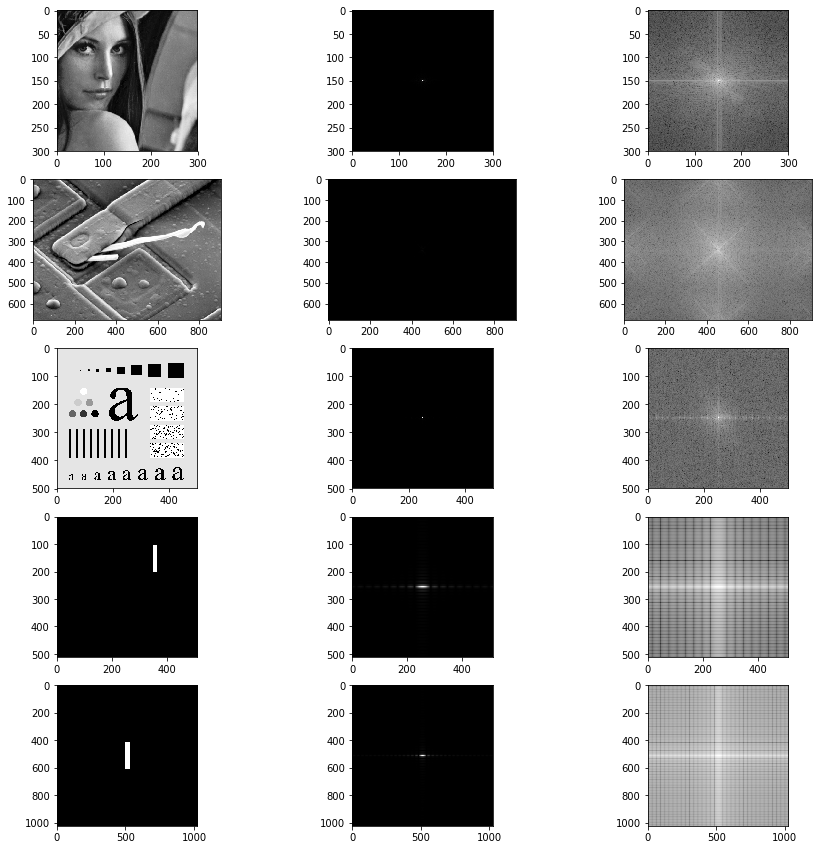

In [3]:
def spectrumVisualization(img):
    # Compute Fourier transform (bidimensional)
    fft = np.fft.fft2(img)
    
    # Center te fft origin in the middle of the image
    ffts = np.fft.fftshift(fft)
    
    # Generate the magnitude spectrum of the fft
    mag = np.abs(ffts)
    
    # That was useless... Apply log intensity transform (e.g convert to dB)
    # Avoid log of 0
    mag[mag==0] = 1e-6
    mag_dB = 20*np.log(mag)
    
    return (mag, mag_dB)
    

# Gather images for computation
imgs_idx = [13, 3, 31, 32, 25]
imgs = [rg(files[i]) for i in imgs_idx]

# Get the spectrum of all images
spec = [spectrumVisualization(img) for img in imgs]

# Printing
f, ax = mplt.subplots(len(spec), 3, figsize=(15,15))

for i in range(len(spec)):
    ax[i][0].imshow(imgs[i], cmap='gray')
    ax[i][1].imshow(spec[i][0], cmap='gray')
    ax[i][2].imshow(spec[i][1], cmap='gray')


### Problem 2

Frequency domain filtering. Write a PYTHON function that performs high-frequency emphasis (hfe) filtering. Recall that an hfe filter is defined as:
\begin{equation}
H_{hfe}(u,v) = a + b \cdot H_{hp}(u,v)
\end{equation}
where $a$ is the offset, $b$ is the high-frequency amplification and $H_{hp}$ is the transfer function of a high-pass filter. Your function should be based on a second-order high-pass Butterworth filter with a cut-off frequency $D_0$, which is given by:
\begin{equation}
H_{hp}(u,v) = \frac{1}{1 + \left[\frac{D_0}{D(u,v)}\right]^{2n}}.
\end{equation}
<b>Note. </b> $D(u,v)$ measures the Euclidean distance from the point $(u,v)$ to the center of the frequency plane.

Use your function and filters on the image <tt>chest.jpg</tt> to reproduce the image enhancement illustrated below.

<img src="../data/files/chest.jpg"/ width=200> <img src="../data/files/out.png"/width=200>

The outline of the process is the following:

1. Create a high-pass Butterworth filter with a frequency domain dimension of 2 times the size of the input image. Plot the filter image.
2. Compute the FFT of the input image using the function <tt>numpy.fft.fft2</tt>. The FFT should have frequency domain dimensions equal to the dimensions of the filter, which should be set using the input parameters of the <tt>fft2</tt> function. Plot the FFT image.
3. Filter the image using the high-pass Butterworth filter. To filter an image in the frequency domain, you should multiply the fourier transform of the image and the frequency response of the filter. To go back to the spatial domain, you need to apply the inverse FFT and take the real component of the resut. Plot the resulting image.
4. Create a high-frequency emphasis filter based on the Butterworth filter of step 1. Plot the filter image.
5. Filter the image using a high-frequency emphasis filter. Plot the resulting image.
6. After filtering, you may need to stretch the intensity values of each resulting image to the range [0, 255]. You can achieve this by substracting the minimum intensity value, dividing by the maximum and multiplying the result by 255.
7. Apply histogram equalization to the image obtained in the previous step. You should obtain a similar result to that shown above.

Use the following parameters for the filters: $a = 0.5$, $b = 2$, $n=2$ and $D_0$ should be set to $5\%$ of the vertical dimension of the filter.

Please comment your results.

### Problem 3

Color spaces. Write a function that converts an image from the RGB color
space to HSI color space. Write another function that converts an image from the HSI
color space to RGB color space. You should use the homework equations to implement these conversions.

When plotting images in the HSI space, you should plot each channel separately, using one image for the H channel, another for the S channel and another for the I channel.

Test your function converting images from RGB to HSI and back to RGB.

### Problem 4

Manipulating color images. Write a function that converts a color image from the RGB to
the HSI color space, modifies the ‘I’ channel by applying histogram equalization, and revert
back the image to the RGB color space. Apply this function to enhance the image <tt>dark_fountain.jpg</tt>.

### Problem 5 

Manipulating color images. Consider the RGB color image <tt>squares.jpg</tt>, where the
squares are pure red, green and blue.

<img src="../data/files/squares.jpg" width=200 />

1. Convert this image to the HSI color space. Blur the H component of the image using a 25x25 averaging mask, and convert it back to RGB. How do you explain the obtained result?
2. Repeat, blurring only the saturation component this time. How do you explain the result?


### Analysis
In this problem we explore other color spaces than RGB. The selected color space HSI, was switched to HLS due to implementation problems; the former color space is not an equivalent transformation of the RGB space. HLS was selected, as it is similar and has a fast implementation in OpenCV. In fact, for the current exercise it does not matter if we select HSI or HLS or HSV, as they all calculte the same Hue parameter.

Once the new color space is selected, we apply a smooth filter of kernel size 25x25 over the H matrix; as a result the borders of the boxes are no longer binary (there is a degradation). When we revert back to RGB we notice that now the colors merge (resulting in yellow between red and green, and cyan between blue and green), this is because the hue parameter is the color pigmentation (matiz in spanish). As can be seen, we can modify the colors of an image without affecting the lighting via a color space transformation.

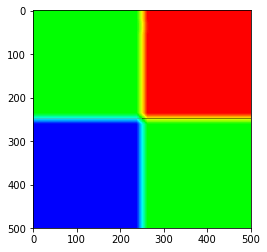

In [2]:
# Read the image
img = cv2.imread(pth + 'squares.jpg')
mplt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Convert to HSI
# OpenCV offers no such a conversion (only to HSV and HLS)
# HLS is recomended, and will be used
# We can argue that Hue is calculated in the same way in all three systems
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)

# Extract H/L/S columns
cols = np.swapaxes(img_hls, 0, 2)
cols = np.swapaxes(cols, 1, 2)

H, L, S = cols

# Average image
kernel = np.ones((25,25),np.float32)/(25**2) 
H = cv2.filter2D(H, -1, kernel)
H[H < 0] = 0

img_sm = np.dstack([H,L,S])


# Revert to RGB
img_bck = cv2.cvtColor(img_sm, cv2.COLOR_HLS2BGR)

mplt.imshow(cv2.cvtColor(img_bck, cv2.COLOR_BGR2RGB))

## Problem 6

False color. Write a Python function that produces a false color visualization of
the input gray-scale image as follows:

1. If the intensity of an input pixel is lower than a threshold $T$, then the color of the corresponding pixel should be blue.
2. If the intensity of an input pixel is larger or equal than a threshold $T$, then the color of the corresponding pixel should be yellow.

Use your function to reproduce the following result on the image <tt>weld_x-ray.jpg</tt>:

<img src="../data/files/weld_x-ray.jpg" width=200 /> <img src="../data/files/Fig6.21(b).jpg" width=200 /> 

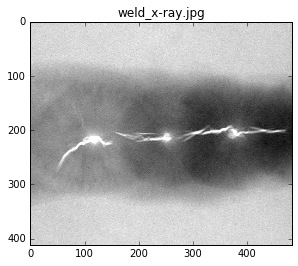

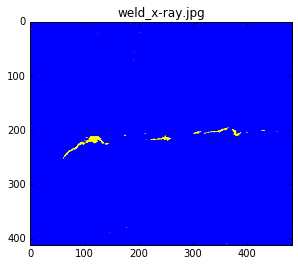

In [8]:
img =  rg(files[-1])
R = np.zeros(img.shape, np.uint8)
G = np.zeros(img.shape, np.uint8)
B = np.zeros(img.shape, np.uint8)

def pixelMapper(oldimage, R, G, B):
    height, width = oldimage.shape 
    
    for row in range(height):
        for col in range(width):
            originalPixel = oldimage[row, col]
            R[row][col],G[row][col],B[row][col] = cambiarPixel(originalPixel)            
    return np.dstack([R,G,B])

def cambiarPixel(pixel, threshold = 250):
    blue = [0, 0, 255]
    yellow = [255,255,0]
    return blue if pixel < threshold else yellow

def falseColor(image, R, G, B):
    return pixelMapper(image, R, G, B)

wi = falseColor(img, R, G, B)

mplt.figure()
mplt.imshow(img, cmap='gray')
mplt.title(files[-1])

mplt.figure()
mplt.imshow(wi)
mplt.title(files[-1])

## Problem 7

Green screen effects. Write a function that replaces the green background of the image <tt>hiro.jpg</tt> with a background image of your choice.

<img src="../data/files/hiro.jpg" width=300>

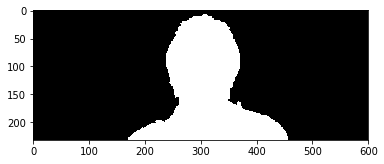

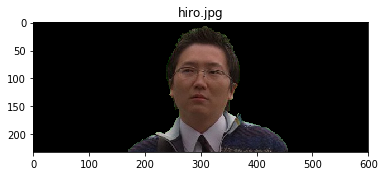

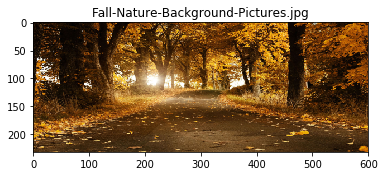

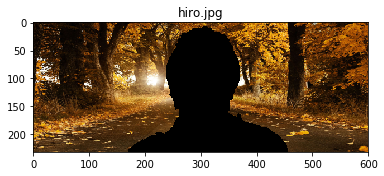

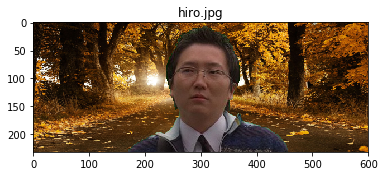

In [20]:
img = cv2.imread('../data/'+'hiro.jpg') 
background = cv2.imread('../data/'+'Fall-Nature-Background-Pictures.jpg')

# Resizing 
image = rg(files[0])
hg, wd = image.shape 
r = 412.5 / wd
dim = (600, int(hg * r))
bk_resized = cv2.resize(background, dim, interpolation = cv2.INTER_AREA)

mask = np.zeros(img.shape[:2], np.uint8)*255
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
rect = (170, 8, 290, 290)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')
img = img * mask2[:,:, np.newaxis]

mplt.figure()
mplt.imshow(mask2, cmap='gray')

mplt.figure()
mplt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
mplt.title(files[15])

mplt.figure()
mplt.imshow(cv2.cvtColor(bk_resized, cv2.COLOR_BGR2RGB))
mplt.title(files[0])

# Substract person area from background
# For that, invert mask2
mask2[mask2==0] = 2
mask2[mask2==1] = 0
mask2[mask2==2] = 1

# multiply with background
bk_cut = bk_resized*np.dstack([mask2,mask2,mask2])

mplt.figure()
mplt.imshow(cv2.cvtColor(bk_cut, cv2.COLOR_BGR2RGB))
mplt.title(files[15])

# Add person to background
final_img = img + bk_cut

mplt.figure()
mplt.imshow(cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB))
mplt.title(files[15])